In [2]:
import open3d as o3d
import numpy as np
from numpy.random import default_rng
from matplotlib import pyplot as plt
import os
import cv2
import sys
import math
import random
from time import sleep
import matplotlib.pyplot as plt
# monkey patches visualization and provides helpers to load geometries
#sys.path.append('..')
#import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
#o3dtut.interactive = not "CI" in os.environ

In [3]:
class cube:
    def __init__(self, x, y, z, w, l, h, thetaX, thetaY, thetaZ):
        self.x = x
        self.y = y
        self.z = z
        self.w = w
        self.l = l
        self.h = h
        thresh = 0.1
        self.thetaX = thetaX
        self.thetaY = thetaY
        self.thetaZ = thetaZ
         
        self.centerx = x + w/2
        self.centery = y + l/2
        self.centerz = z + h/2
        self.pts_total = 0
        self.inliers_total =0
        ptA = [x, y, z]
        ptB = [x+self.w, y, z]
        ptC = [x, y+self.l, z]
        ptD = [x+self.w, y+self.l, z]
        ptE = [x, y, z+self.h]
        ptF = [x+self.w, y, z+self.h]
        ptG = [x, y+self.l, z+self.h]
        ptH = [x+self.w, y+self.l, z+self.h]
    
        pointsInit = [
            ptA,
            ptB,
            ptC,
            ptD,
            ptE,
            ptF,
            ptG,
            ptH
        ]
        ptA1 = [x-thresh, y-thresh, z-thresh]
        ptB1 = [x+self.w+thresh, y-thresh, z-thresh]
        ptC1 = [x-thresh, y+self.l+thresh, z-thresh]
        ptD1 = [x+self.w+thresh, y+self.l+thresh, z-thresh]
        ptE1 = [x-thresh, y-thresh, z+self.h+thresh]
        ptF1 = [x+self.w+thresh, y-thresh, z+self.h+thresh]
        ptG1 = [x-thresh, y+self.l+thresh, z+self.h+thresh]
        ptH1 = [x+self.w+thresh, y+self.l+thresh, z+self.h+thresh]
    
        pointsInit1 = [
            ptA1,
            ptB1,
            ptC1,
            ptD1,
            ptE1,
            ptF1,
            ptG1,
            ptH1
        ]
        lines = [
            [0, 1],
            [0, 2],
            [1, 3],
            [2, 3],
            [4, 5],
            [4, 6],
            [5, 7],
            [6, 7],
            [0, 4],
            [1, 5],
            [2, 6],
            [3, 7],
        ]
        lines1 = [
            [0, 1],
            [0, 2],
            [1, 3],
            [2, 3],
            [4, 5],
            [4, 6],
            [5, 7],
            [6, 7],
            [0, 4],
            [1, 5],
            [2, 6],
            [3, 7],
        ]
        
        colors = [[1, 0, 0] for i in range(len(lines))]
        colors1 = [[0, 1, 0] for i in range(len(lines1))]
        
        self.line_set = o3d.geometry.LineSet(
            points=o3d.utility.Vector3dVector(pointsInit),
            lines=o3d.utility.Vector2iVector(lines),
        )
        self.line_set1 = o3d.geometry.LineSet(
            points=o3d.utility.Vector3dVector(pointsInit1),
            lines=o3d.utility.Vector2iVector(lines1),
        )
        self.line_set.colors = o3d.utility.Vector3dVector(colors)
        self.line_set1.colors = o3d.utility.Vector3dVector(colors1)
        rotation=self.line_set.get_rotation_matrix_from_xyz((math.radians(self.thetaX),math.radians(self.thetaY),math.radians(self.thetaZ)))
        #rotation1=self.line_set1.get_rotation_matrix_from_xyz((math.radians(self.thetaX),math.radians(self.thetaY),math.radians(self.thetaZ)))
        self.line_set.rotate(rotation, (self.centerx,self.centery,self.centerz))
        self.line_set1.rotate(rotation, (self.centerx,self.centery,self.centerz))
        
    def check_pts(self, points):
        pts_tfd = np.asarray(self.line_set.points)
        ptA, ptB, ptC, ptD, ptE, ptF, ptG, ptH = pts_tfd
        pts_tfd1 = np.asarray(self.line_set1.points)
        ptA1, ptB1, ptC1, ptD1, ptE1, ptF1, ptG1, ptH1 = pts_tfd1
        
        dir1 = (ptB-ptA)
        size1 = np.linalg.norm(dir1)
        dir1 = dir1 / size1
        
        dir2 = (ptC-ptA)
        size2 = np.linalg.norm(dir2)
        dir2 = dir2 / size2

        dir3 = (ptE-ptA)
        size3 = np.linalg.norm(dir3)
        dir3 = dir3 / size3
        
        dir11 = (ptB1-ptA1)
        size11 = np.linalg.norm(dir11)
        dir11 = dir11 / size11
        
        dir21 = (ptC1-ptA1)
        size21 = np.linalg.norm(dir21)
        dir21 = dir21 / size21

        dir31 = (ptE1-ptA1)
        size31 = np.linalg.norm(dir31)
        dir31 = dir31 / size31

        cube_center = np.array([self.centerx, self.centery, self.centerz]).reshape(1,3)
        self.pts_total = points.shape[0]
        pts_indices = np.arange(points.shape[0])
        indices = pts_indices.tolist()
        #print(points.shape, cube_center.shape)
        dir_vec =points - cube_center 
        res1 = np.where( (np.absolute(np.dot(dir_vec, dir1)) * 2) >= size1 )[0]
        res2 = np.where( (np.absolute(np.dot(dir_vec, dir2)) * 2) >= size2 )[0]
        res3 = np.where( (np.absolute(np.dot(dir_vec, dir3)) * 2) >= size3 )[0]
        
        res11 = np.where( (np.absolute(np.dot(dir_vec, dir11)) * 2) >= size11 )[0]
        res21 = np.where( (np.absolute(np.dot(dir_vec, dir21)) * 2) >= size21 )[0]
        res31 = np.where( (np.absolute(np.dot(dir_vec, dir31)) * 2) >= size31 )[0]

        fits =   list( set().union(res1, res2, res3) )
        fits1 = set(indices)- set(list( set().union(res11, res21, res31) ))
        self.inliers_total = len(np.intersect1d(fits,list(fits1)))
                
        return self.inliers_total

In [4]:
class GA:
    def __init__(self):
        self.population=[]
        self.fitness =[]
        self.params = ['x', 'y', 'z', 'w', 'l', 'h', 'thetaX', 'thetaY', 'thetaZ']
        
    def init_popultation(self, size):
        #self.population=[]
        self.size = size
        for _ in range(self.size):
            rand_x = random.uniform(-3, 3)
            rand_y = random.uniform(-3, 3)
            rand_z = random.uniform(-3, 3)
            rand_w = random.uniform(0.1, 4)
            rand_l = random.uniform(0.1, 4)
            rand_h = random.uniform(0.1, 4)
            rand_thetaX = random.uniform(0, 360)
            rand_thetaY = random.uniform(0, 360)
            rand_thetaZ = random.uniform(0, 360)
            self.population.append(cube(rand_x,rand_y,rand_z,rand_w,rand_l,rand_h,rand_thetaX,rand_thetaY,rand_thetaZ))
            
    def calc_fitness(self):
        self.fitness =[]
        for i in range(self.size):  
            self.fitness.append( 100*(self.population[i].inliers_total/(self.population[i].pts_total-self.population[i].inliers_total+1)))   
        x = zip(self.fitness,self.population)
        xs = sorted(x,reverse = True, key=lambda tup: tup[0])
        self.fitness = [x[0] for x in xs]
        self.population = [x[1] for x in xs]
        #print(self.fitness)
        
    def selection(self):
        self.population = self.population[:int(len(self.population)/2)]
        
    
    def crossover(self, r1, r2):
        a = np.random.random(1)
        b = 1 - a
        
        x_new_1 = a * r1.x + b * r2.x
        y_new_1 = a * r1.y + b * r2.y
        z_new_1 = a * r1.y + b * r2.y
        w_new_1 = a * r1.w + b * r2.w
        l_new_1 = a * r1.l + b * r2.l
        h_new_1 = a * r1.h + b * r2.h
        thetaX_new_1 = a * r1.thetaX + b * r2.thetaX
        thetaY_new_1 = a * r1.thetaY + b * r2.thetaY
        thetaZ_new_1 = a * r1.thetaZ + b * r2.thetaZ
        self.cube_new_1 = cube(x_new_1,y_new_1,y_new_1,w_new_1,l_new_1,h_new_1,thetaX_new_1,thetaY_new_1,thetaZ_new_1)
        a = 1 - a
        b = 1 - b
        x_new_2 = a * r1.x + b * r2.x
        y_new_2 = a * r1.y + b * r2.y
        z_new_2 = a * r1.z + b * r2.z
        w_new_2 = a * r1.w + b * r2.w
        l_new_2 = a * r1.l + b * r2.l
        h_new_2 = a * r1.h + b * r2.h
        thetaX_new_2 = a * r1.thetaX + b * r2.thetaX
        thetaY_new_2 = a * r1.thetaY + b * r2.thetaY
        thetaZ_new_2 = a * r1.thetaZ + b * r2.thetaZ
        self.cube_new_2 = cube(x_new_2,y_new_2,y_new_2,w_new_2,l_new_2,h_new_2,thetaX_new_2,thetaY_new_2,thetaZ_new_2)
        
        return self.cube_new_1, self.cube_new_2
        
    def repopulate(self):
        self.offspring = []
        
        for _ in range(len(self.population)):
            population_indices = list(range(0,len(self.population)))
            index_1 = np.random.randint(0,len(self.population)-1,1)
            new_popultaion_indices = [el for el in population_indices if el != index_1]
            index_2 = random.choice(new_popultaion_indices)
            #print(index_2)
            child_1, child_2 = self.crossover(self.population[index_1[0]],self.population[index_2]) 
            self.offspring.append(child_1)
            #self.offspring.append(child_2)
        self.population = self.population + self.offspring
        
    def mutate(self, cube):
        mutation_rate_1 = 0.8
        mutation_rate_2 = 2
        cube.x += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.y += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.z += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.w += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.l += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.h += (mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0]))
        cube.thetaX += mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0])
        cube.thetaY += mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0])
        cube.thetaZ += mutation_rate_1*(1-mutation_rate_2*np.random.random(1)[0])
        return cube
    
    def mutate1(self, mutation_rate):
        rng = default_rng()
        total_gen = len(self.population)*9
        mutation_chance = round(mutation_rate*total_gen)
        R_mutate_indices = rng.choice(len(self.population)*9, size=mutation_chance, replace=False)
        #print(R_mutate_indices)
        #R_mutate_indices = np.random.randint(0,population.size,[mutation_chance,1])
        #R_mutate_val = np.random.randint(0,30,[mutation_chance,1])
        
        for i in R_mutate_indices:
            #print(population[int(i/9)].__dict__[self.params[i%9]], 'before')
            self.population[int(i/9)].__dict__[self.params[i%9]] += 0.8*(1-2*np.random.random(1)[0])
            #print(population[int(i/9)].__dict__[self.params[i%9]], 'after')
            #print(i%9)
        #print(len(population))
        
    
    def mutate_population(self):
        for i in range(len(self.population)):
            self.population[i] = self.mutate(self.population[i])

Best fitness: 17.604790419161674


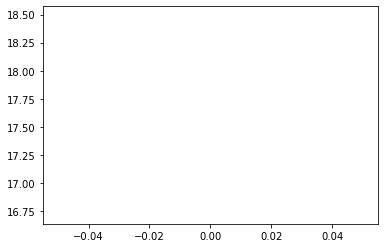

In [5]:
if __name__ == '__main__':
    #random.seed(1)
    vis = o3d.visualization.Visualizer()
    pcd = o3d.io.read_point_cloud("models/cube_test1.ply")
    number_steps = 30
    experiments = list()
    for e in range(1):
        best_fit = 0
        best_model = None
        algorithm = GA()
        algorithm.init_popultation(20)
        vis.create_window(width = 800, height = 600)
        #pcd = o3d.io.read_point_cloud("D:/Open3D/Open3D-master/examples/test_data/fragment.ply") 
        vis.add_geometry(pcd)
        geometry_list = list()
    
    
    #for i in range(len(algorithm.population)):
        
        for _ in range(number_steps):
            random.shuffle(algorithm.population)
            #print(algorithm.population)
            vis.add_geometry(pcd)
            for i in range(len(algorithm.population)):
                vis.add_geometry(algorithm.population[i].line_set)
                vis.add_geometry(algorithm.population[i].line_set1)

                inliers = algorithm.population[i].check_pts(np.asarray(pcd.points))

            algorithm.calc_fitness()
            if algorithm.fitness[0]>best_fit:
                best_fit = algorithm.fitness[0]
                #print('Found better fintess: ',best_fit, 'at', _ )
                best_model = algorithm.population[0]

            algorithm.selection()
            algorithm.repopulate()
            algorithm.mutate1(0.3)
            #algorithm.mutate_population()
            
            vis.poll_events()
            vis.update_renderer()
            vis.clear_geometries()
            
        experiments.append(best_fit)
        print('Best fitness:', best_fit)
    plt.plot(experiments)
    plt.show()
    
    vis.add_geometry(pcd)
    vis.add_geometry(best_model.line_set)
    vis.add_geometry(best_model.line_set1)
    vis.run()
    vis.destroy_window()
    

# RANSAC EXPERIMENT

## Utilities

In [8]:
def find_hull(points):
    
    inliers_pcd = o3d.geometry.PointCloud()
    inliers_pcd.points = o3d.utility.Vector3dVector(points)
    #print(type(inliers_pcd))
    hull, _ = inliers_pcd.compute_convex_hull()
    hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
    color = np.random.rand(3).tolist()
    hull_ls.paint_uniform_color(color)
    return hull_ls


In [9]:
def color_pts(points):
    inliers_pcd = o3d.geometry.PointCloud()
    inliers_pcd.points = o3d.utility.Vector3dVector(points)
    color = np.random.rand(3)
    #color = np.array([0,0,0])
    point_colors = np.tile(color, (points.shape[0],1))
    inliers_pcd.colors = o3d.utility.Vector3dVector(point_colors)
    return inliers_pcd

## Find Plane

In [10]:
class plane:
    def __init__(self, M0, M1, M2):
        A0 = np.linalg.det(np.array([[M1[1]-M0[1],M2[1]-M0[1]],[M1[2]-M0[2],M2[2]-M0[2]]]))
        A1 = np.linalg.det(np.array([[M1[0]-M0[0],M2[0]-M0[0]],[M1[2]-M0[2],M2[2]-M0[2]]]))
        A2 = np.linalg.det(np.array([[M1[0]-M0[0],M2[0]-M0[0]],[M1[1]-M0[1],M2[1]-M0[1]]]))
        self.A = A0
        self.B = -A1
        self.C = A2
        self.D = -M0[0]*A0+M0[1]*A1-M0[2]*A2
    def calc_dist(self, pcd):
        R = np.absolute(self.A*pcd[:,0]+self.B*pcd[:,1]+self.C*pcd[:,2]+self.D)/(np.sqrt(self.A**2+self.B**2+self.C**2)+ sys.float_info.epsilon)
        #print(type(R))
        return R

In [91]:
def find_pts_plane(pcd):
    indexA = np.random.randint(0,pcd.shape[0])
    A = pcd[indexA]
    #print(A)
    distancesA = np.sqrt((pcd[:,0] - A[0])**2+(pcd[:,1] - A[1])**2+ (pcd[:,2] - A[2])**2)
    
    #Calculating B probabilities
    roundedA = np.around(distancesA,1)
    uniqueB, countsB = np.unique(roundedA, return_counts = True)
    probabilitiesB = countsB/distancesA.shape[0]
    plt.plot(uniqueB, probabilitiesB)
    plt.show()
    choose_thresholded_value_B = np.random.choice(uniqueB, p=probabilitiesB)
    B_candidate_indices = np.argwhere(roundedA==choose_thresholded_value_B)
    B_candidate_indices = B_candidate_indices.reshape(B_candidate_indices.shape[0])
    indexB = np.random.choice(B_candidate_indices)
    B = pcd[indexB]
    #print(B)
    #print(np.sqrt((B[0] - A[0])**2+(B[1] - A[1])**2+ (B[2] - A[2])**2))
    
    pcd = np.delete(pcd, [indexA,indexB],0) 
    #pcd = np.delete(pcd, indexB,0)
   
    
    #Calculating C probabilities
    mid_AB = np.array([(A[0]+B[0])/2,(A[1]+B[1])/2,(A[2]+B[2])/2])
    distances_mid_AB = np.sqrt((pcd[:,0] - mid_AB[0])**2+(pcd[:,1] - mid_AB[1])**2+ (pcd[:,2] - mid_AB[2])**2)
    roundedAB = np.around(distances_mid_AB,1)
    uniqueC, countsC = np.unique(roundedAB, return_counts = True)
    probabilitiesC = countsC/distances_mid_AB.shape[0]
    
    #plt.plot(uniqueC, probabilitiesC)
    #plt.show()
    choose_thresholded_value_C = np.random.choice(uniqueC, p=probabilitiesC)
    C_candidate_indices = np.argwhere(roundedAB==choose_thresholded_value_C)
    C_candidate_indices = C_candidate_indices.reshape(C_candidate_indices.shape[0])
    indexC = np.random.choice(C_candidate_indices)
    C = pcd[indexC]
    #print(C)
    
    return A, B, C
   

In [78]:
def find_plane(pcd, iterations, threshold):
    #print(np.asarray(pcd.points).shape[0])
    #vis = o3d.visualization.Visualizer()
    #vis.create_window(width = 800, height = 600)
    #vis.add_geometry(pcd)
    best_fit = 0
    best_inliers_pts = None
    
    inliers = None
    best_model = list()
    for i in range(iterations):
        A, B, C = find_pts_plane(np.asarray(pcd.points))
        p = plane(A,B,C)
        R = p.calc_dist(np.asarray(pcd.points))
        inliers = np.where(R<=threshold)[0]
        inliers_len = inliers.shape[0] +3
        #print(inliers)
        inliers_pts = np.take(np.asarray(pcd.points),inliers,axis=0)
        #print(inliers)
        outliers = np.asarray(pcd.points).shape[0] - inliers_len
        #print(outliers)
        fit = inliers_len/outliers
        if fit>best_fit:
            best_fit = fit
            print('Found better fintess: ',best_fit, 'at', i )
            best_model = [A,B,C]
            best_inliers_pts = inliers_pts
            best_inlier_indices = inliers
        #points = np.array([A,B,C])
        #lines =[[0,1],[1,2],[2,0]]
        #colors = [[1, 0, 0] for i in range(len(lines))]
        #line_set = o3d.geometry.LineSet(
        #        points=o3d.utility.Vector3dVector(points),
        #        lines=o3d.utility.Vector2iVector(lines),
        #    )

        #line_set.colors = o3d.utility.Vector3dVector(colors)
        '''
        vis.add_geometry(pcd)
        vis.add_geometry(line_set)
        vis.poll_events()
        vis.update_renderer()
        vis.clear_geometries()
        '''
    
        
    #hull = find_hull(best_inliers_pts)  
    #vis.add_geometry(hull)
    points = np.array(best_model)
    #lines =[[0,1],[1,2],[2,0]]
    #colors = [[1, 0, 0] for i in range(len(lines))]
    #line_set = o3d.geometry.LineSet(
    #        points=o3d.utility.Vector3dVector(points),
    #        lines=o3d.utility.Vector2iVector(lines),
    #    )

    #line_set.colors = o3d.utility.Vector3dVector(colors)
    
    #vis = o3d.visualization.Visualizer()
    #vis.create_window(width = 800, height = 600)
    #vis.add_geometry(pcd)
    #vis.add_geometry(line_set)
    #vis.run()
    #vis.destroy_window()
    return best_model, best_inliers_pts, best_inlier_indices

## Find shpere

In [79]:
class sphere:
    def __init__(self, M1, M2, N1, N2):
        M1_2 = M1 + N1
        M2_2 = M2 + N2
        

## Main

PointCloud with 981 points.


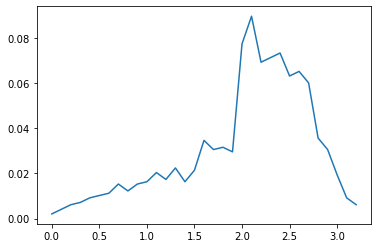

Found better fintess:  0.07447973713033954 at 0
PointCloud with 916 points.


In [97]:
pcd = o3d.io.read_point_cloud("models/cube_test1.ply")
#pcd = o3d.io.read_point_cloud("models/fragment.ply") 
#pcd = o3d.io.read_point_cloud("aivisum.ply")
'''
color_raw = o3d.io.read_image("models/apple_1_1_12.png")
depth_raw = o3d.io.read_image("models/apple_1_1_12_depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
'''
#pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])





vis = o3d.visualization.Visualizer()
vis.create_window(width = 800, height = 600)
vis.add_geometry(pcd)

print(pcd)
models_list = []
inliers_list = []
for i in range(1):
    model, inliers, inliers_indices = find_plane(pcd,1,0.09)
    if inliers.shape[0]>15:
        models_list.append(model)
        inliers_list.append(inliers)
        #print(inliers)
        #hull = find_hull(inliers)  
        #vis.add_geometry(hull)
        pts = color_pts(inliers)
        vis.add_geometry(pts)
        #print(np.asarray(pcd.colors))
        #print(type(pcd.points))
        #pcd1 = np.delete(pcd, [indexA,indexB],0) 
        #print(pcd1.shape)
        pcd.points = o3d.utility.Vector3dVector(np.delete(np.asarray(pcd.points), inliers_indices,0))
        #vis.add_geometry(line_set)
        print(pcd)
color = np.array([0,0,0])
point_colors = np.tile(color, (np.asarray(pcd.points).shape[0],1))
colors = o3d.utility.Vector3dVector(point_colors)
#point_colors = np.tile(color, (points.shape[0],1))
pcd.colors = o3d.utility.Vector3dVector(point_colors)
vis.run()
vis.destroy_window()

In [53]:
#pcd = o3d.io.read_point_cloud("C:/Open3D-master/examples/test_data/fragment.ply") 
#pcd = o3d.io.read_point_cloud("Base.ply")
depth_map = "models/V18-10-47-662.jpg"
image = cv2.imread(depth_map)
#print(np_img.shape[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
#print(shape)
img = o3d.geometry.Image(gray)
print(img)

pinhole_camera_intrinsic = o3d.io.read_pinhole_camera_intrinsic('models/intrinsic.json')

pcd = o3d.geometry.PointCloud.create_from_depth_image(depth = img, intrinsic= pinhole_camera_intrinsic, depth_trunc=10000)
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

#downpcd = o3d.geometry.PointCloud.voxel_down_sample(pcd, voxel_size=0.05)
#o3d.geometry.PointCloud.estimate_normals(
#        downpcd,
#        search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,
#                                                          max_nn=30))

vis1 = o3d.visualization.Visualizer()
vis1.create_window(width = 800, height = 600)
#vis1.add_geometry(downpcd)
vis1.add_geometry(pcd)
vis1.run()
vis1.destroy_window()

Image of size 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


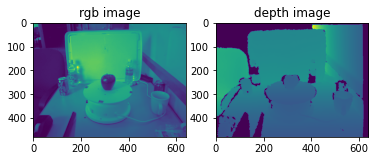

In [102]:
color_raw = o3d.io.read_image("models/apple_1_1_12.png")
depth_raw = o3d.io.read_image("models/apple_1_1_12_depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('rgb image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])


downpcd = o3d.geometry.PointCloud.voxel_down_sample(pcd, voxel_size=0.05)
o3d.geometry.PointCloud.estimate_normals(
        downpcd,
        search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,
                                                          max_nn=30))

vis1 = o3d.visualization.Visualizer()
vis1.create_window(width = 800, height = 600)
vis1.add_geometry(downpcd)
#vis1.add_geometry(pcd)
vis1.run()
vis1.destroy_window()

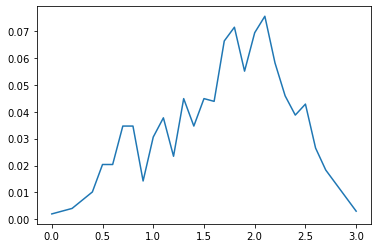

In [95]:
pcd = o3d.io.read_point_cloud("models/cube_test1.ply")
A,B,C = find_pts_plane(np.asarray(pcd.points))
points = np.array([A,B,C])
lines =[[0,1],[1,2],[2,0]]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = o3d.geometry.LineSet(
        points=o3d.utility.Vector3dVector(points),
        lines=o3d.utility.Vector2iVector(lines),
    )
 
line_set.colors = o3d.utility.Vector3dVector(colors)
vis = o3d.visualization.Visualizer()
vis.create_window(width = 800, height = 600)
vis.add_geometry(pcd)
vis.add_geometry(line_set)
vis.run()
vis.destroy_window()